# plot_timeseries.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 03 July 2022

Purpose: Read in data output from the average_statistics_tz function in LESnc.py and plot timeseries comparisons of multiple LES cases. 

## Imports

In [1]:
import os
import seaborn
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import yaml
import seaborn

## Data formatting

Reading in settings

In [2]:
with open('/home/rfrost/plotting/plot_timeseries.yaml', 'r') as f:
    settings = yaml.safe_load(f)

Reading in average_statistics_tz.nc data

In [3]:
sims = settings['sims']
df_all = []
for sim in sims:
    df = xr.load_dataset(f"{settings['dnc']}{sim}/{settings['t0']}_{settings['t1']}_{settings['fstats']}")
    df_all.append(df)

for i, s in enumerate(df_all):
    # convert time to hours
    s["time"] = (s.time / 3600.) + (settings['t0'] * settings['delta_t'] / 3600.)

## Plotting

Plot formatting

In [4]:
# tex fonts
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
rc('figure',facecolor='white')
# z/zi to be plotted
heights = np.array(settings["heights"])
nh = len(heights)
# ug values
ug = np.array([12,15])
# color
cmap = seaborn.color_palette("Spectral", as_cmap=True)
colors1 = seaborn.color_palette("rocket_r", len(ug))

### 2 x 3 timeseries of: 

$\langle Q_0 \rangle\\$
$\langle w_* \rangle\\$ 
$\langle  u_* \rangle\\$
$\langle L \rangle\\$
$\langle z_i \rangle\\$
$\langle -z_i / L \rangle\\$

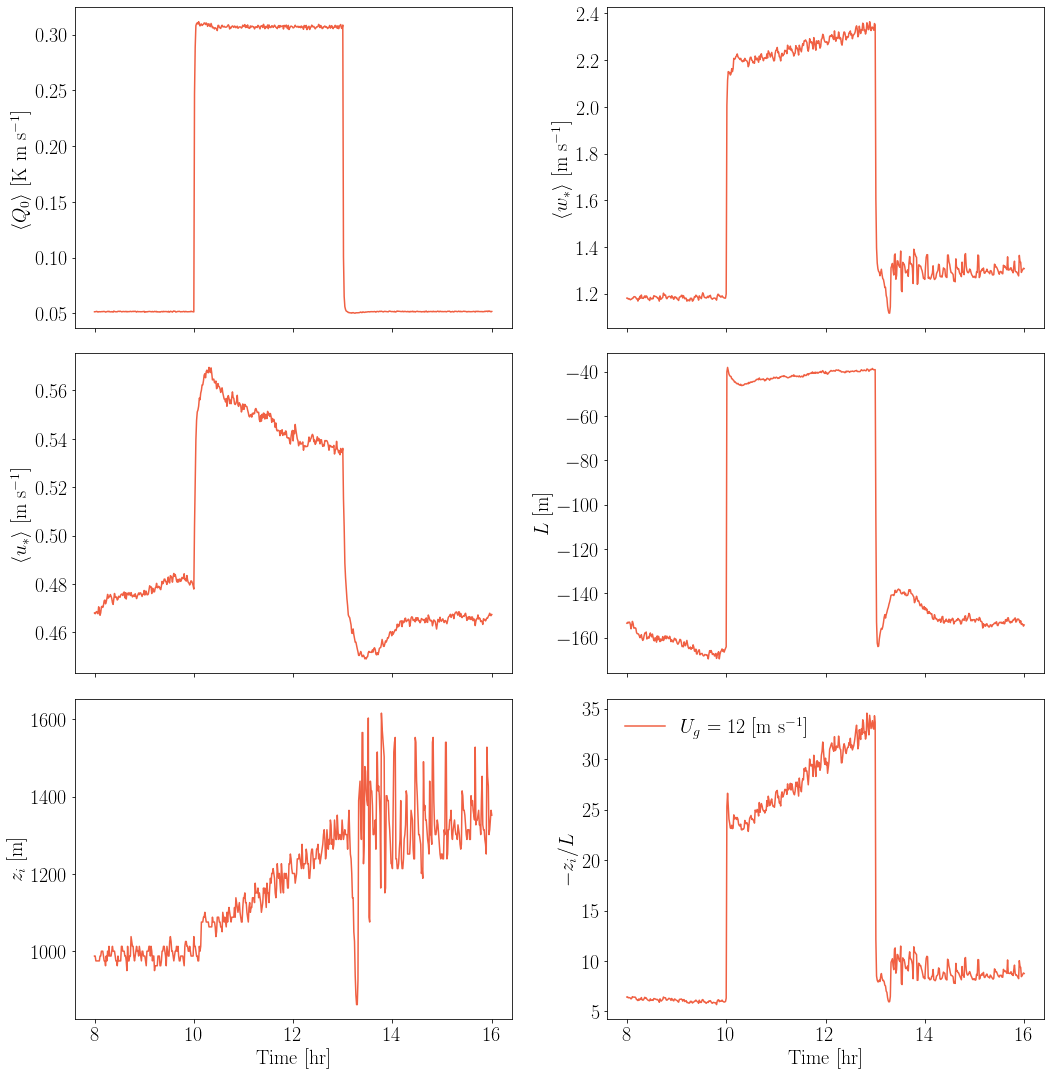

In [11]:
fig1, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(15,15))

# plotting
for i, s in enumerate(df_all):
    # (a) tw_cov_tot timeseries
    ax1[0,0].plot(s.time,s.tw_cov_tot.isel(z=0), c=colors1[i])
    # (b) wstar timeseries
    ax1[0,1].plot(s.time, s.wstar, c=colors1[i])
    # (c) ustar timeseries
    ax1[1,0].plot(s.time, s.ustar0, c=colors1[i])
    # (d) obukhov length
    ax1[1,1].plot(s.time, s.L, c=colors1[i])
    # (e) z_i timeseries
    ax1[2,0].plot(s.time, s.zi, c=colors1[i])
    # (f) -z_i/L timeseries
    ax1[2,1].plot(s.time, s.zi_L, c=colors1[i], label=f"$U_g$ = {ug[i]} [m s$^{{{-1}}}$]")

# clean up
# (a)
ax1[0,0].set_ylabel("$\langle Q_0 \\rangle$ [K m s$^{-1}$]")
# (b)
ax1[0,1].set_ylabel("$\\langle w_{*} \\rangle$ [m s$^{-1}$]")
# (c)
ax1[1,0].set_ylabel("$\\langle u_{*} \\rangle$ [m s$^{-1}$]")
# (d)
ax1[1,1].set_ylabel("$L$ [m]")
# (e)
ax1[2,0].set_ylabel("$z_{i}$ [m]")
# (f)
ax1[2,1].set_ylabel("$-z_{i}/L$")
ax1[2,1].legend(frameon=False, labelspacing=0.10, loc="upper left")
# ax1[2,1].set_ylim(0,10)
# fig
fig1.tight_layout()
# vertical lines
# for iax in ax1[:,0]:
#     [iax.axvline(tt, c="k", ls=":", lw=2) for tt in settings['tload']]
# for iax in ax1[:,1]:
#     [iax.axvline(tt, c="k", ls=":", lw=2) for tt in settings['tload']]
# # text labels above dotted lines
# for tt, lab in zip(settings['tload'], list("abcdef")):
#     ax1[0,0].text(tt, .317, f"({lab})", fontsize=20, ha="center", va="bottom")
#     ax1[0,1].text(tt, 2.8, f"({lab})", fontsize=20, ha="center", va="bottom")
# xlim
# plt.xlim(4,10)
# x label
for iax in ax1[2,:]:
    iax.set_xlabel("Time [hr]")
# save figure
if settings['save_fig']:
    if not os.path.exists(timeseries):
        os.makedirs(timeseries)
    fig1.savefig(f"{timeseries}3x2_{round(t0*delta_t/3600,2)}hr_{round(t1*delta_t/3600,2)}hr.png", transparent=False)
else:
    plt.show()
plt.close(fig1)

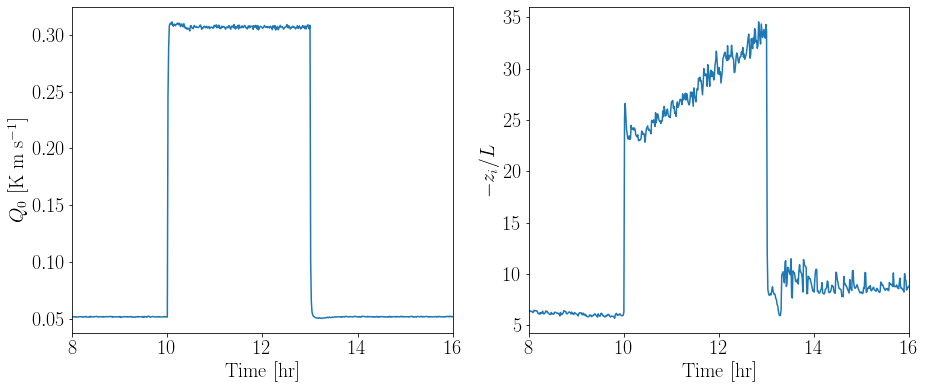

In [6]:
fig1, ax = plt.subplots(ncols=2, figsize=(15,6))

for i, s in enumerate(df_all):
    ax[0].plot(s.time, s.tw_cov_tot.isel(z=0))
    ax[1].plot(s.time, s.zi_L)

ax[0].set_ylabel("$Q_0$ [K m s$^{-1}$]")
ax[1].set_ylabel("$-z_i / L$")
for iax in ax:
    iax.set_xlabel("Time [hr]")
    iax.set_xlim(8,16)

plt.show()
plt.close(fig1)

<bound method Figure.tight_layout of <Figure size 2160x1080 with 3 Axes>>

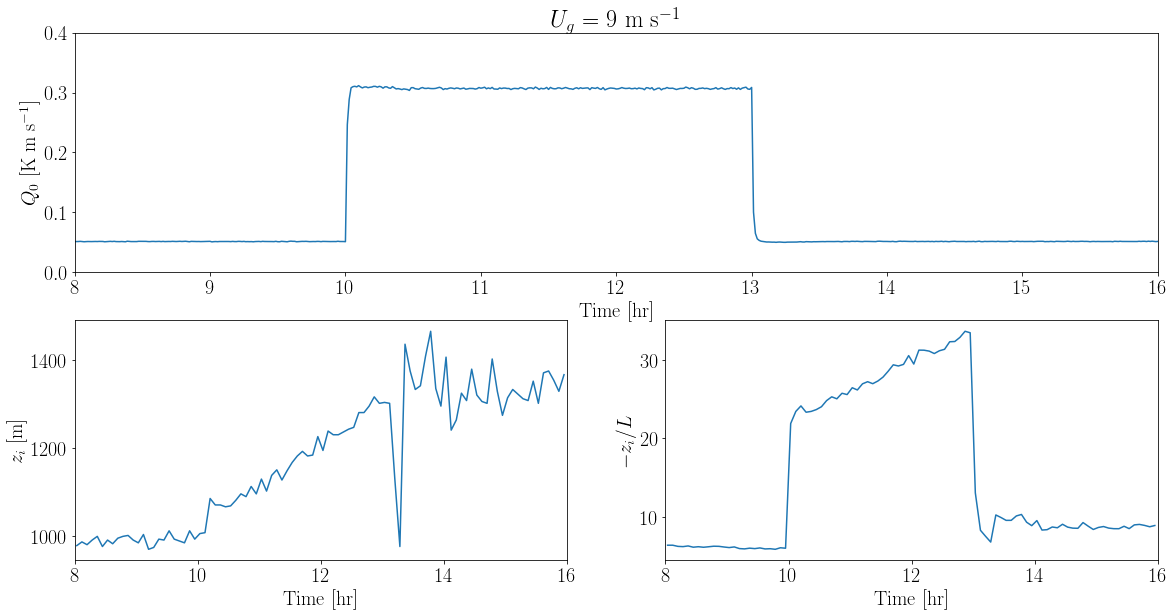

In [18]:
fig, ax = plt.subplots(nrows=2, figsize=(30,15), sharex=True)

for i, s in enumerate(df_all):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=2)
    ax1.plot(s.time, s.tw_cov_tot.isel(z=0))
    ax2 = plt.subplot2grid((3,3), (1,0), colspan=1)
    ax2.plot(s.time.coarsen(time=6, boundary="trim").mean(), s.zi.coarsen(time=6, boundary="trim").mean())
    ax3 = plt.subplot2grid((3,3), (1,1), colspan=1)
    ax3.plot(s.time.coarsen(time=6, boundary="trim").mean(), s.zi_L.coarsen(time=6, boundary="trim").mean())

ax1.set_xlim(8,16), ax2.set_xlim(8,16), ax3.set_xlim(8,16)
ax1.set_ylim(0,0.4)
ax1.xaxis.set_major_locator(MultipleLocator(1)), ax2.xaxis.set_major_locator(MultipleLocator(2)), ax3.xaxis.set_major_locator(MultipleLocator(2))
ax1.set_ylabel("$Q_0$ [K m s$^{-1}$]"), ax2.set_ylabel("$z_i$ [m]"), ax3.set_ylabel("$-z_i / L$")
ax1.set_xlabel("Time [hr]"), ax2.set_xlabel("Time [hr]"), ax3.set_xlabel("Time [hr]")
ax1.set_title("$U_g$ = 9 m s$^{-1}$")

fig.tight_layout

### 1 x 3 timeseries of:

$\langle Q_0 \rangle\\$
$\langle u'u' \rangle\\$
$\langle w'w' \rangle\\$

No handles with labels found to put in legend.


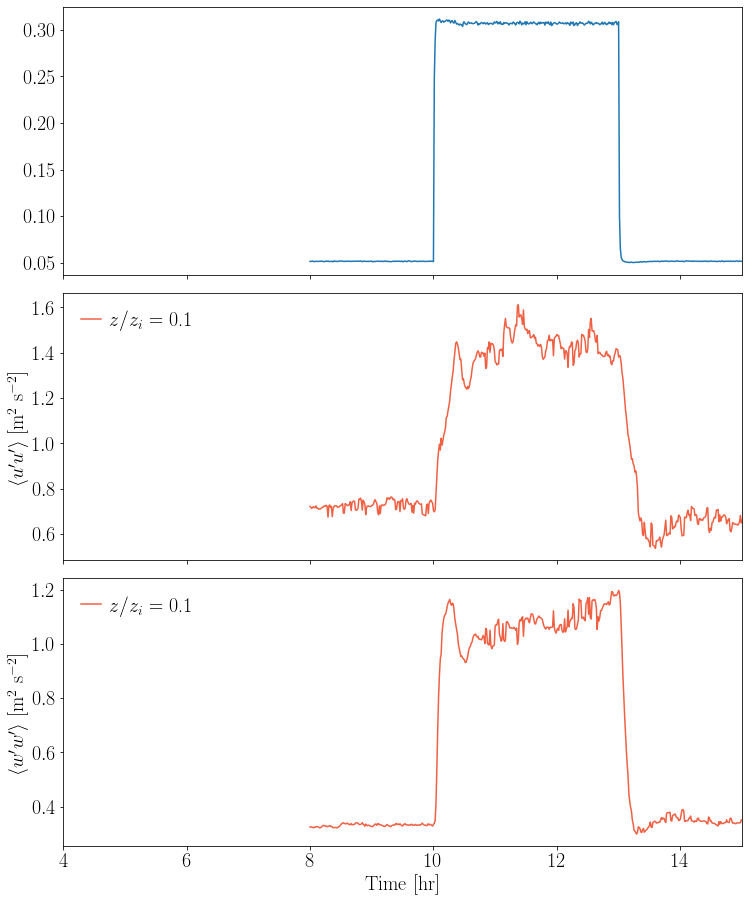

In [8]:
fig4, ax = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(12,14))
# plotting
# for i, s in enumerate(df_all):
# (a) tw_cov_tot timeseries
ax[0].plot(df_all[0].time, df_all[0].tw_cov_tot.isel(z=0))
for h in range(nh):
    # (b) u'u'
    ax[1].plot(df_all[0].time, df_all[0].uu_var.isel(z=(heights[h]*df_all[0].zi/(settings['Lz']/settings['res'])).astype(int)), 
                label=f"$z / z_i$ = {heights[h]}", c=colors1[h])
    # (c) w'w'
    ax[2].plot(df_all[0].time, df_all[0].ww_var.isel(z=(heights[h]*df_all[0].zi/(settings['Lz']/settings['res'])).astype(int)),
                label=f"$z / z_i$ = {heights[h]}", c=colors1[h])

# clean up
# (a)

# (b)
ax[1].set_ylabel("$ \\langle u'u' \\rangle$ [m$^2$ s$^{-2}$]")
# ax[1].set_ylim(0,2)
# (c)
ax[2].set_ylabel("$\langle w'w' \\rangle$ [m$^2$ s$^{-2}$]")
ax[2].set_xlabel("Time [hr]")
# ax[2].set_ylim(0,3)
# fig
fig4.tight_layout(pad=3, h_pad=.5)
fig4.patch.set_facecolor("white")
plt.xlim(4,15)
for iax in ax:
    # vertical lines
    # [iax.axvline(tt, c="k", ls=":", lw=2) for tt in settings['tload']]
    # legend
    iax.legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper left")
# text labels above dotted lines
# for tt, lab in zip(settings['tload'], list("abcdef")):
#     ax[0].text(tt, .317, f"({lab})", fontsize=20, ha="center", va="bottom")

# save and close
if settings['save_fig']:
    if not os.path.exists(timeseries):
        os.makedirs(timeseries)
    fig4.savefig(f"{timeseries}fluxes_1x3_{round(t0*delta_t/3600,2)}hr_{round(t1*delta_t/3600,2)}hr.png")
else:
    plt.show()
plt.close(fig4)

### 2 x 2 timeseries of:

$\frac{\partial}{\partial t} \langle u_* \rangle \\$
$\frac{\partial}{\partial t} \langle w_* \rangle \\$
$\frac{\partial}{\partial t} \langle z_i \rangle \\$
$\frac{\partial}{\partial t} \langle -z_i / L \rangle \\$

Calculate differentials

In [9]:
for i, s in enumerate(df_all):
    # differentiate
    s["ustar0_diff"] = s.ustar0.differentiate("time",1)
    s["wstar_diff"] = s.wstar.differentiate("time",1)
    s["zi_diff"] = s.zi.differentiate("time",1)
    s["zi_L_diff"] = s.zi_L.differentiate("time",1)

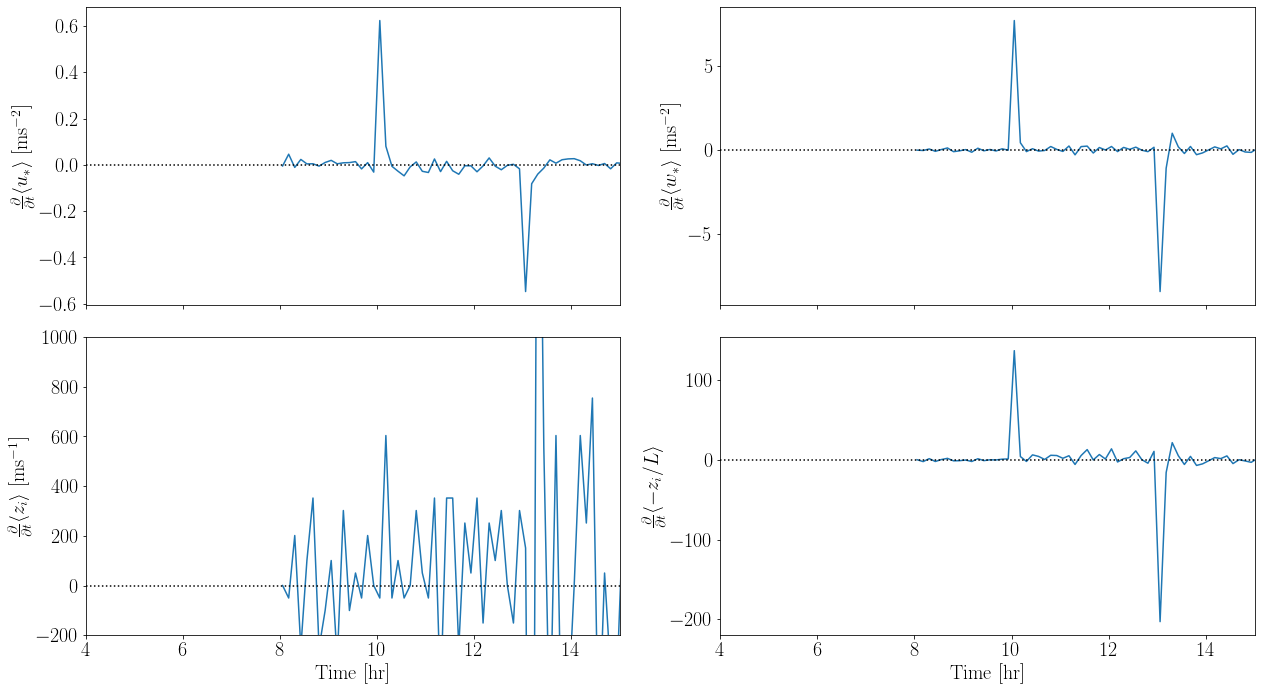

In [10]:
fig5, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize = (18,10))
avg = 9
# plotting
for i, s in enumerate(df_all):
        # a
        ax[0,0].plot(s.time.coarsen(time=avg, boundary="trim").mean(),
                    s.ustar0_diff.coarsen(time=avg, boundary="trim").mean())
        # b
        ax[0,1].plot(s.time.coarsen(time=avg, boundary="trim").mean(),
                    s.wstar_diff.coarsen(time=avg, boundary="trim").mean())
        # c
        ax[1,0].plot(s.time.coarsen(time=avg, boundary="trim").mean(),
                    s.zi_diff.coarsen(time=avg, boundary="trim").mean())
        # d
        ax[1,1].plot(s.time.coarsen(time=avg, boundary="trim").mean(),
                    s.zi_L_diff.coarsen(time=avg, boundary="trim").mean())
            

# clean up
# a
ax[0,0].set_ylabel("$\\frac{\partial}{\partial t} \\langle u_* \\rangle$ [ms$^{-2}$]")
# b
ax[0,1].set_ylabel("$\\frac{\partial}{\partial t} \\langle w_* \\rangle$ [ms$^{-2}$]")
# ax[0,1].set_ylim(-.001,.003)
# c
ax[1,0].set_ylabel("$\\frac{\partial}{\partial t} \\langle z_i \\rangle$ [ms$^{-1}$]")
ax[1,0].set_xlabel("Time [hr]")
ax[1,0].set_ylim(-200,1000)
# d
ax[1,1].set_ylabel("$\\frac{\partial}{\partial t} \\langle -z_i / L \\rangle$")
ax[1,1].set_xlabel("Time [hr]")
# ax[1,1].set_ylim(-.1, .1)

# fig
fig5.tight_layout()
plt.xlim(4,15)
# vertical lines
# for iax in ax[:,0]:
#     [iax.axvline(tt, c="k", ls=":", lw=2) for tt in settings['tload']]
# for iax in ax[:,1]:
#     [iax.axvline(tt, c="k", ls=":", lw=2) for tt in settings['tload']]
# # text labels above dotted lines
# for tt, lab in zip(settings['tload'], list("abcdef")):
#     ax[0,0].text(tt, .000317, f"({lab})", fontsize=20, ha="center", va="bottom")
#     ax[0,1].text(tt, .0103, f"({lab})", fontsize=20, ha="center", va="bottom")
for iax in ax[0,:]:
    iax.axhline(y=0, ls=":", color="black")
for iax in ax[1,:]:
    iax.axhline(y=0, ls=":", color="black")

# save and close
if settings['save_fig']:
    if not os.path.exists(timeseries):
        os.makedirs(timeseries)
    fig5.savefig(f"{timeseries}convergence_test_{wt_s}_{round(t1*delta_t/3600,2)}hr.png")
else:
    plt.show()
plt.close(fig5)